<a href="https://colab.research.google.com/github/kamilasouzac/Analise_Carrinho_de_Compras/blob/main/An%C3%A1lise_Carrinho_de_Compras_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RECAPITULANDO**

Estamos trabalhando com o dataset originalmente disponível no Kaggle para fazermos um estudo da cesta do carrinho de compras.

O dataset original pode ser encontrado em: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

Ao final do projeto, queremos responder todas as seguintes perguntas:

1. Quais são os itens mais vendidos?
2. Quais items podem ser removidos do cardápio para dar espaço para novos pratos?
3. Qual período do dia a padaria mais vende?
4. O movimento no final de semana é maior do que durante a semana?
5. Existe alguma sazonalidade nas vendas?
6. Quais são os itens mais vendidos em conjunto?
7. Quais combos a padaria pode criar para estimular as vendas?

Na parte 1 (o notebook pode ser encontrado nesse mesmo repositório), tratamos nosso dataset, traduzindo os valores para facilitar o acesso do público brasileiro, verificamos se existiam dados nulos e transformamos o dtypes para melhor uso durante as análises.

Respondemos ainda as três primeiras perguntas, e preparamos nossa apresentação inicial para nosso cliente (o deck de slides também está disponível nesse repositório).

Agora, vamos dar continuidade ao estudo, respondendo as perguntas 4 e 5.

#**PREPARANDO O AMBIENTE**

###Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.2 which is incompatible.


###Gráficos

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6) #Tamanho do gráfico
sns.set_theme(style = 'whitegrid', palette = 'plasma')

#**IMPORTANDO O DATASET**

Iremos importar o dataframe já tratado durante a primeira etapa do nosso projeto. Para um passo a passo do que foi feito durante o tratamento do DF original, referenciar o notebook 1: Análise_Carrinho_de_Compras_Parte_1

In [ ]:
df = pd.read_csv('df_tratado.csv')

In [ ]:
df.head()

,Transação,Item,Período_do_Dia,Período_da_Semana,Carimbo_data,Data,Dia,Mês,Ano,Hora,Hora_Completa
0,1,Pão,Manhã,Final_de_Semana,2016-10-30 09:58:00,2016-10-30,Domingo,Outubro,2016,9,09:58
1,2,Escandinavo,Manhã,Final_de_Semana,2016-10-30 10:05:00,2016-10-30,Domingo,Outubro,2016,10,10:05
2,2,Escandinavo,Manhã,Final_de_Semana,2016-10-30 10:05:00,2016-10-30,Domingo,Outubro,2016,10,10:05
3,3,Chocolate quente,Manhã,Final_de_Semana,2016-10-30 10:07:00,2016-10-30,Domingo,Outubro,2016,10,10:07
4,3,Geléia,Manhã,Final_de_Semana,2016-10-30 10:07:00,2016-10-30,Domingo,Outubro,2016,10,10:07


In [ ]:
df['Carimbo_data'] = pd.to_datetime(df['Carimbo_data'])

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transação          20507 non-null  int64         
 1   Item               20507 non-null  object        
 2   Período_do_Dia     20507 non-null  object        
 3   Período_da_Semana  20507 non-null  object        
 4   Carimbo_data       20507 non-null  datetime64[ns]
 5   Data               20507 non-null  datetime64[ns]
 6   Dia                20507 non-null  object        
 7   Mês                20507 non-null  object        
 8   Ano                20507 non-null  int64         
 9   Hora               20507 non-null  int64         
 10  Hora_Completa      20507 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 1.7+ MB


## **4. O movimento no final de semana é maior do que durante a semana?**

Para respondermos essa pergunta, vamos iniciar com uma visualização gráfica do movimento durante os dias da semana:

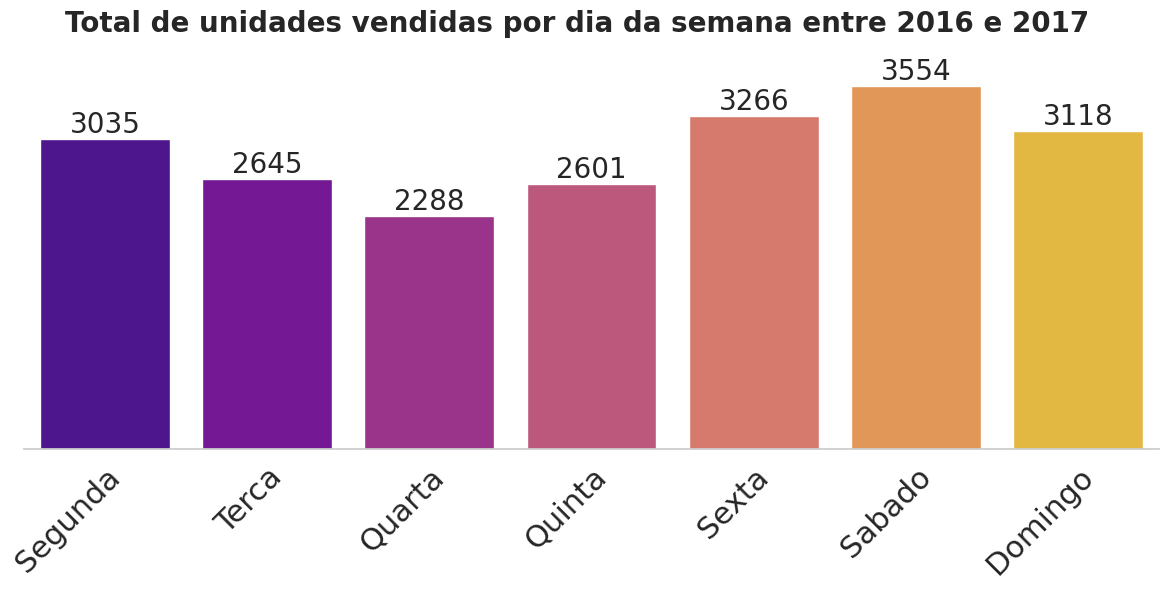

In [ ]:
# Criando a representação gráfica do movimento ao longo da semana

ax = sns.countplot(x = 'Dia',
                   data = df,
                   order=['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo'],
                   palette='plasma')

for label in ax.containers:
    ax.bar_label(label, fontsize = 20)

sns.despine(left = True)
plt.xticks(fontsize=22, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
plt.suptitle('Total de unidades vendidas por dia da semana entre 2016 e 2017', fontsize=22, fontweight='bold')
plt.tight_layout()

plt.savefig("Total de unidades vendidas por dia da semana entre 2016 e 2017.png", bbox_inches='tight')

**Observações:**

>As vendas são maiores no Sábado

>Dentre os dias úteis, a Sexta-feira tem a maior venda

A seguir, vamos calcular a *média* de items vendidos por período da semana (dia_útil x fds):

In [ ]:
# Obtendo as vendas por período

dia_semana = df.groupby('Período_da_Semana')['Item'].count().to_frame()
dia_semana

,Item
Período_da_Semana,
Dia_Útil,12807
Final_de_Semana,7700


In [ ]:
media_venda_semana = 12807/5
media_venda_fds = 7700/2
aumento = ((media_venda_fds-media_venda_semana)/media_venda_semana) * 100

print('A média de vendas nos dias úteis é:', media_venda_semana)
print('A média de vendas nos finais de semana:', media_venda_fds)
print('O aumento das vendas entre os dias úteis para o final de semana é de {:.0f}%'.format(aumento))

A média de vendas nos dias úteis é: 2561.4
A média de vendas nos finais de semana: 3850.0
O aumento das vendas entre os dias úteis para o final de semana é de 50%


**Observações:**

>As vendas nos finais de semana são, em média 50% maiores do que nos dias úteis.

###**Bônus**

Para fins práticos, entender a distribuição de frequência entre os dias da semana já é suficiente para orientar decisões estratégicas.

No ententanto, como este projeto é para fins de estudo, vamos adicionar um passo extra, e aplicar um teste estatístico para confirmar se a diferença entre as frequências é estatisticamente significativa.

Como a variável em questão é categórica, usaremos o teste do Chi Quadrado:

> Frequência esperada: consideramos que a frequência deveria ser igual entre todos os dias.

> Hipótese Nula (H0): as frequências observadas são consistentes com as frequências esperadas.

> Hipótese Alternativa (H1): as frequências observadas não são consistentes com as frequências esperadas.

> α = 0,05

In [ ]:
from scipy.stats import chisquare

In [ ]:
_, p = chisquare(df['Dia'].value_counts())
p

1.0676430660784328e-81

**Observação:**

> Como o valor de *p<0,05* rejeitamos a hipótese nula e aceitamos a hipótese alternativa. Ou seja, a diferença entre os dias da semana é estatistiamente significativa.

#**5. Existe alguma sazonalidade nas vendas?**

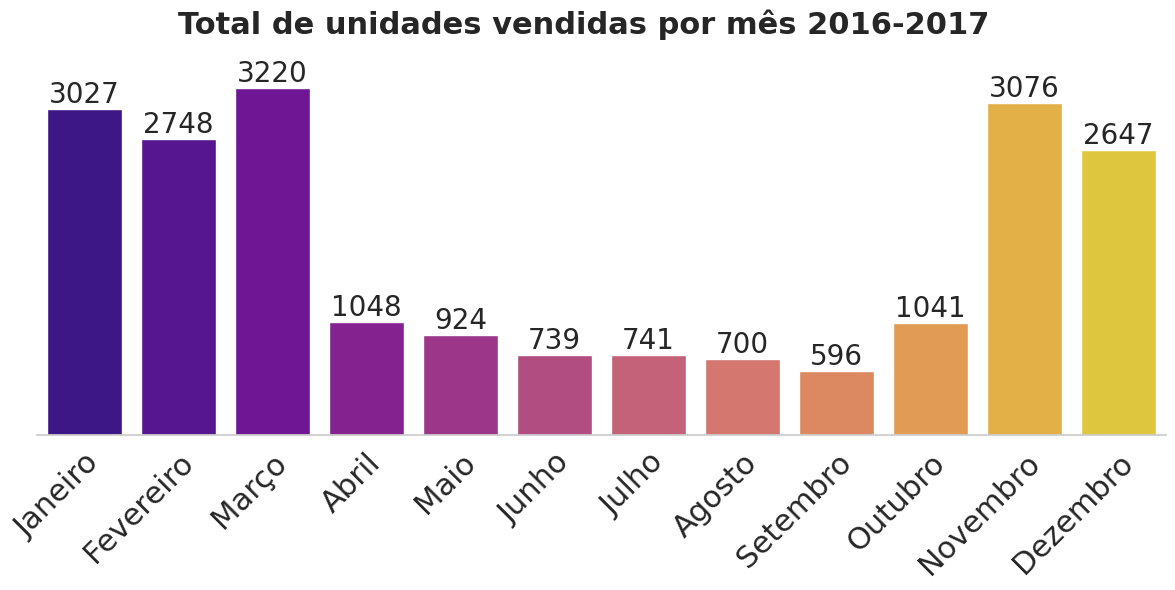

In [ ]:
#Criando gráfico de vendas por mês

ax = sns.countplot(x = 'Mês',
                   data = df,
                   order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                   palette='plasma')

for label in ax.containers:
    ax.bar_label(label, fontsize = 20)

sns.despine(left = True)
plt.xticks(fontsize=22, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
plt.suptitle('Total de unidades vendidas por mês 2016-2017', fontsize=22, fontweight='bold')
plt.tight_layout()

plt.savefig("Total de unidades vendidas por mês 2016-2017.png")

**Observações:**

>A principio, as vendas parecem maiores de Novembro a Março - os períodos mais frios (já que estamos analisando dados do hemisfério norte).

Vamos investigar a seguir se essa sazonalidade realmente existe.

Para tanto, vamos iniciar plotando um gráfico de linha:

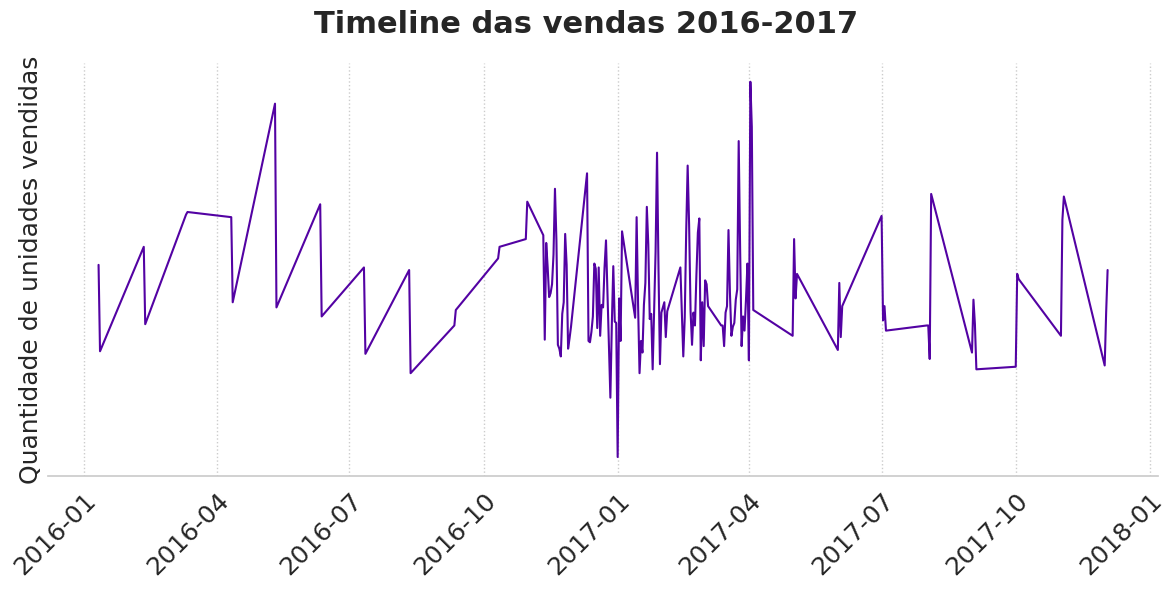

In [ ]:
#Criando representação gráfica das vendas por mês

df_count = df.groupby('Data')['Item'].count().reset_index()

ax = sns.lineplot(x='Data', y='Item', data=df_count)

sns.despine(left = True)
plt.xticks(fontsize=18, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('')
plt.yticks([])
plt.ylabel('Quantidade de unidades vendidas', fontsize=18,)
plt.suptitle('Timeline das vendas 2016-2017', fontsize=22, fontweight='bold')
plt.tight_layout()
ax.grid(linestyle=':')

plt.savefig("Timeline vendas 2016-2017.png")

**Observaçoes:**

 > Analisando a gráfico de linha, percebemos um comportamento fora do padrão entre novembro 2016 e abril 2027.

 Vamos olhar no detalhe as vendas mensais por ano para entender esse comportamento:

In [ ]:
sazonalidade = df.groupby(['Mês', 'Ano'])['Item'].count().unstack()
sazonalidade['Diferença'] = sazonalidade[2017] - sazonalidade [2016]
sazonalidade.index = pd.Categorical(sazonalidade.index, ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
sazonalidade.sort_index()

Ano,2016,2017,Diferença
Janeiro,233,2794,2561
Fevereiro,268,2480,2212
Março,380,2840,2460
Abril,308,740,432
Maio,392,532,140
Junho,307,432,125
Julho,229,512,283
Agosto,212,488,276
Setembro,218,378,160
Outubro,688,353,-335


**Observações:**:

 > O pico de vendas do negócio foi entre Novembro de 2016 e Março de 2017. Não temos informações suficiente para entender se esse aumento foi decorrente de uma ação de marketing, por exemplo.

 > Em Abril de 2017 as vendas voltam a cair.

Pela diferênça nas vendas entre o mesmo período durante os anos, sabemos que não encontraremos uma sazonalidade clara. Ainda assim, para fins de treino, iremos usar o seasonal_decompose.

In [ ]:
# Importar biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicando o modelo
result = seasonal_decompose(df.groupby('Data')['Item'].count(), period = 3)

#Criando no DF
observacao = result.observed
tendencia = result.trend
sazonalidade = result.seasonal
ruido = result.resid

data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
Data,,,,
2016-01-11,150.0,NaN,-3.041243,NaN
2016-01-12,83.0,132.333333,0.447871,-49.781205
2016-02-11,164.0,117.000000,2.593372,44.406628
2016-02-12,104.0,152.333333,-3.041243,-45.292090
2016-03-11,189.0,161.333333,0.447871,27.218795


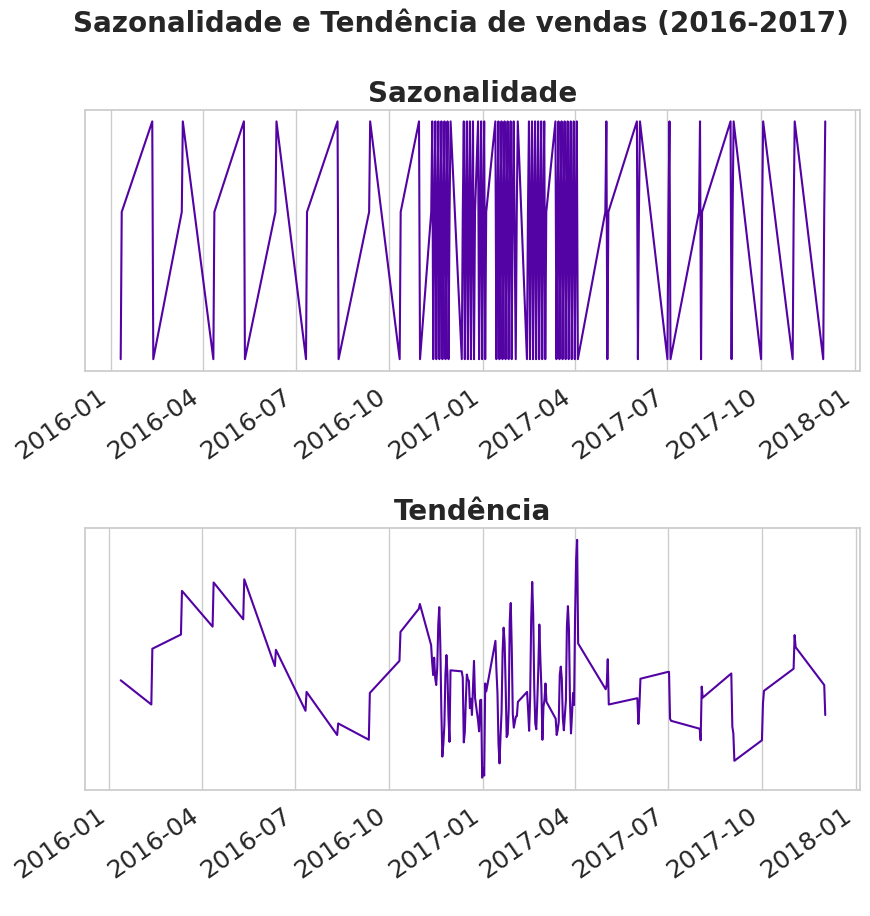

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (10,10))
plt.subplots_adjust(wspace=0.1,hspace=0.6)
plt.setp(axes, yticks=[])

fig.suptitle('Sazonalidade e Tendência de vendas (2016-2017)', fontsize=20, fontweight='bold')

ax1 = result.seasonal.plot(ax=axes[0])

ax1.set_title ("Sazonalidade", fontsize = 20, fontweight='bold')
ax1.tick_params(axis='x', labelsize=18, rotation=35)
ax1.set_xlabel(' ')

ax2 = result.trend.plot(ax=axes[1])

ax2.set_title ("Tendência", fontsize = 20, fontweight='bold')
ax2.tick_params(axis='x', labelsize=18, rotation=35)
ax2.set_xlabel(' ')

plt.savefig("Sazonalidade e Tendência de vendas (2016-2017).png")

**Observação:**

> O pico de vendas identificado anteriormente pode ter sido decorrente de ação promocional, evento de marketing da empresa, ou seja um evento pontual que alterou o ritmo das vendas, não sendo um padrão natural de consumo.

##To be continued

Finalizaremos nossa análise por aqui, e reponderemos as duas últimas perguntas do nosso estudo em um notebook futuro.